<a href="https://colab.research.google.com/github/Srabontideb/Basic_Neural_network_Algorithms/blob/main/kohonen_%26_hopfield(lab_04).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Kohonen algorithm, also known as the Self-Organizing Map (SOM) algorithm, is an unsupervised learning technique developed by Teuvo Kohonen in the 1980s. It is not a deep learning algorithm, but rather a shallow neural network that focuses on dimensionality reduction and feature extraction.

Steps of Kohenen:

1. **Initialization**: Randomly assign weights to neurons.
2. **Competitive Learning**: Find the Best Matching Unit (BMU) for each input data point.
3. **Cooperative Learning**: Update the BMU and its neighbors' weights.
4. **Convergence**: Repeat steps 2-3 until the network reaches a stable state or a set number of iterations.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

Initilize Weight

In [ ]:
def initialize_weights(input_dim, map_size):
    return np.random.rand(map_size[0], map_size[1], input_dim)


BMU finding & weight updating function

In [ ]:
def find_bmu(input_vector, weights):
    distances = np.linalg.norm(input_vector - weights, axis=2)
    bmu_idx = np.unravel_index(np.argmin(distances), distances.shape)
    return bmu_idx

def update_weights(weights, bmu_idx, input_vector, learning_rate, radius):
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            distance = np.linalg.norm([i - bmu_idx[0], j - bmu_idx[1]])
            if distance <= radius:
                weights[i, j] += learning_rate * (input_vector - weights[i, j])

def get_bmus(X, trained_weights):
    bmus = []
    for input_vector in X:
        bmu_idx = find_bmu(input_vector, trained_weights)
        bmus.append(bmu_idx)
    return np.array(bmus)

Train function

In [ ]:
def train_som(X, map_size, epochs, init_learning_rate, init_radius):
    input_dim = X.shape[1]
    weights = initialize_weights(input_dim, map_size)

    for epoch in range(epochs):
        learning_rate = init_learning_rate * (1 - epoch / epochs)
        radius = init_radius * (1 - epoch / epochs)

        for input_vector in X:
            bmu_idx = find_bmu(input_vector, weights)
            update_weights(weights, bmu_idx, input_vector, learning_rate, radius)

    return weights

Dataset Generation

In [ ]:
# Create a random dataset with two groups
group1 = np.random.rand(100, 2) * 0.5
group2 = (np.random.rand(100, 2) * 0.5) + 0.5
X = np.vstack([group1, group2])
print(X)

[[0.17279564 0.15378032]
 [0.10278027 0.1999033 ]
 [0.14977807 0.15888381]
 [0.28337183 0.10795367]
 [0.19016663 0.06914208]
 [0.32066487 0.13498101]
 [0.46476703 0.41877566]
 [0.38568983 0.05761511]
 [0.37005331 0.28217604]
 [0.00790111 0.25358176]
 [0.16225766 0.07564935]
 [0.25540026 0.45790204]
 [0.29451848 0.01013904]
 [0.28920189 0.15867234]
 [0.06999735 0.17187101]
 [0.29313898 0.03819378]
 [0.05711024 0.48321311]
 [0.37716345 0.08853809]
 [0.06289007 0.33708762]
 [0.28342856 0.33523626]
 [0.09111602 0.20941169]
 [0.05686001 0.05752768]
 [0.07828621 0.06149481]
 [0.17975692 0.41620987]
 [0.04721503 0.05726649]
 [0.25975642 0.42669337]
 [0.17915046 0.20591797]
 [0.31611986 0.27407561]
 [0.12411207 0.49970795]
 [0.46539937 0.3966585 ]
 [0.40863345 0.14922802]
 [0.1819458  0.49823933]
 [0.25164266 0.18545784]
 [0.18355548 0.00868229]
 [0.21371778 0.29514558]
 [0.11367635 0.29202238]
 [0.30286684 0.13857106]
 [0.34555632 0.44710134]
 [0.11307538 0.37186531]
 [0.38414505 0.22535297]


Training

In [ ]:
# Train the SOM with the dataset
map_size = (10, 10)


epochs = 100
init_learning_rate = 0.1
init_radius = max(map_size) / 2

trained_weights = train_som(X, map_size, epochs, init_learning_rate, init_radius)

# Get the BMUs for each data point in the dataset
bmus = get_bmus(X, trained_weights)


Plotting (testing)

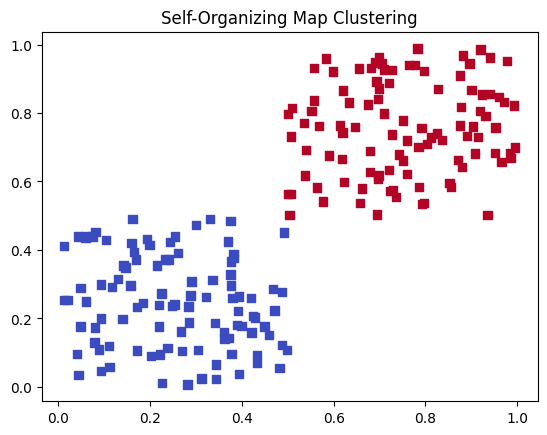

In [ ]:
def plot_som_clusters(X, bmus):
    group_labels = np.zeros(len(bmus))

    # Assign labels to each data point based on their group
    group_labels[:len(group1)] = 0
    group_labels[len(group1):] = 1

    plt.scatter(X[:, 0], X[:, 1], c=group_labels, cmap='coolwarm', marker='s')
    plt.title('Self-Organizing Map Clustering')
    plt.show()

# Visualize the SOM clustering
plot_som_clusters(X, bmus)


In [ ]:

# To calculate accuracy, we assume each data point has a known label (group 1 or group 2 in this case).
# Accuracy will be calculated based on whether the majority label of data points for which each neuron is the BMU matches the actual group of those data points.

def calculate_som_accuracy(X, bmus, map_size, group1, group2):
    # Create labels for the data points: 0 for Group 1, 1 for Group 2
    labels = np.array([0] * len(group1) + [1] * len(group2))

    # Create a map to store the majority label for each neuron
    neuron_labels = np.empty(map_size, dtype=int)

    # Count labels for each neuron's BMUs
    for i in range(map_size[0]):
        for j in range(map_size[1]):
            # Get all data points for which this neuron is the BMU
            bmu_mask = (bmus == [i, j]).all(axis=1)
            if np.any(bmu_mask):
                # Assign majority label
                neuron_labels[i, j] = np.bincount(labels[bmu_mask]).argmax()
            else:
                # If no data points for this neuron, assign a dummy label (e.g., -1)
                neuron_labels[i, j] = -1

    # Calculate accuracy
    correct_predictions = 0
    for idx, label in enumerate(labels):
        if neuron_labels[tuple(bmus[idx])] == label:
            correct_predictions += 1

    accuracy = correct_predictions / len(labels)
    return accuracy

# Calculate the accuracy
accuracy = calculate_som_accuracy(X, bmus, map_size, group1, group2)
accuracy

0.995

**Hopfield**

Hopfield
The Hopfield network is a type of recurrent neural network, developed by John Hopfield in 1982. It is used primarily for associative memory and pattern recognition tasks. The network consists of interconnected neurons that act as both input and output nodes. It has a simple learning rule and can store multiple patterns in its memory, which can then be recalled using partial or noisy inputs.

The main steps of the Hopfield algorithm are as follows:

1. **Initialization**: Initialize the network's weights and biases. The weights are symmetric, and the diagonal elements (self-connections) are set to zero.
2. **Learning**: Train the network using the Hebbian learning rule to store the desired patterns. This involves updating the weights based on the outer product of the patterns.
3. **Energy**: Compute the energy function for the network, which is a measure of the stability of the network's states.
4. **Recall**: Given a partial or noisy input pattern, update the network's neurons asynchronously using the activation function until the network converges to a stable state, which corresponds to one of the stored patterns.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
def train_hopfield(patterns):
    n_neurons = patterns.shape[1]
    weights = np.zeros((n_neurons, n_neurons))

    for p in patterns:
        weights += np.outer(p, p)

    np.fill_diagonal(weights, 0)
    return weights / patterns.shape[0]

def recall(pattern, weights, n_steps=10):
    for _ in range(n_steps):
        pattern = np.sign(np.dot(pattern, weights))
    return pattern

def accuracy(predicted_patterns, true_patterns):
    return np.mean([np.all(p == t) for p, t in zip(predicted_patterns, true_patterns)])

In [ ]:
# Define binary patterns (use -1 and 1 for representing 0 and 1)
patterns = np.array([
    [-1, -1,  1, -1],
    [ 1,  1, -1,  1]
])

# Train the Hopfield network
weights = train_hopfield(patterns)

# Create noisy versions of the patterns
noisy_patterns = np.array([
    [-1, -1, -1, -1],
    [ 1,  1,  1,  1]
])

In [ ]:
# Recall the original patterns from noisy inputs
recalled_patterns = np.array([recall(p, weights) for p in noisy_patterns])
print(recalled_patterns)
# Calculate accuracy
acc = accuracy(recalled_patterns, patterns)
print(f"Accuracy: {acc:.2f}")

[[-1. -1.  1. -1.]
 [ 1.  1. -1.  1.]]
Accuracy: 1.00
